# Project Python - QSAR 🐍 

---

## Nader Narcisse 🐙

### *Table of Contents*
- Abstract
  - [Abstract](#Abstract)
  - [Requirements](#Requirements)
- 1) Data Collection 🗄️
- 2) Data Cleaning 🧹
  - [Step 1](#2) : 
  - [Step 1](#2) :
- 3) Data Augmentation
  - [Step 1](#2) : 
  - [Step 1](#2) :
- 4) EDA 🔎
  - [Step 1](#Step-1) :
  - [Step 2](#3) :
- Models 🐼
  - [Exercice 2](#exercise-2) : Use Case n°1
  - [Exercise 3](#exercise-3) : Use case n°2

<a name="Abstract">

## Abstract
---

The Goal of this project is to use **QSAR-Data (Quantitative Structure Ability Relationship)** from chemical compounds and classify biodegradable substances. We are dealing with a **classication problem.** We are trying to predict a discrete value output: ***Degradable*** and ***Non Degradable.***

Since the compounds can last hundreds of years before beding decomposed, degradability will take time accordingly. This is where the approach of QSAR begins to shine. Just by looking at relatively quick to obtain molecular propreties, the molecules behavior (in this case biodegradability) can be estimated. Thus helping to ensue correct disposal of chemicals and saving the environment, while also reducing expensive longterm experiments.


The challenge here personnally is that I have no experience nor solid chemical background knowledge. This project was definitely intriguing for me. I had to do research on the mattter to at least have a solid understanding on this dataset.

DATASET LINK : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

<a name="Requirements">

## Requirements
---

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import clone
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<a name="Data Collection">

## Data Collection
---

In [145]:
df = pd.read_csv("biodeg.csv", sep = ";", header = None)

In [146]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [147]:
df.shape

(1055, 42)

We can see that there are total 41 features and 1 target class named 'experimental_class' in this dataset. Also, there are 1055 instances.

<a name="Data Cleaning">

## Data Cleaning
---

The DataFrame is missing column descriptions. The following script is opening the .txt file, with the description that has been copied from the web site, and was turned into a Pandas DataFrame.

In [148]:
f = open("Text_Description.txt", "r")
description_df = pd.DataFrame(columns = ["molecular_descriptors", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    description_df.loc[len(description_df)] = info.split(": ",1)

In [149]:
description_df #Column descriptions for each molecular_descriptors shows up

,molecular_descriptors,description
0,SpMax_L,Leading eigenvalue from Laplace matrix
1,J_Dz(e),Balaban-like index from Barysz matrix weighted...
2,nHM,Number of heavy atoms
3,F01[N-N],Frequency of N-N at topological distance 1
4,F04[C-N],Frequency of C-N at topological distance 4
5,NssssC,Number of atoms of type ssssC
6,nCb-,Number of substituted benzene C(sp2)
7,C%,Percentage of C atoms
8,nCp,Number of terminal primary C(sp3)
9,nO,Number of oxygen atoms


In [150]:
df.columns = description_df.molecular_descriptors #assign describtions to column header

In [151]:
df.head()

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [152]:
df.info() #Valid Dtype for Machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

## 2.1 - Missing Data

In [153]:
df.isnull().sum()

molecular_descriptors
SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                

In [154]:
df.isnull().sum().sum()

0

Fortunately, there is no missing data we can proceed with the next step

## 2.2

Because we have a classification problem, we will  class it will be encoded as 1, wheres as non degradability will be decoded as 0

In [155]:
df.replace(["RB","NRB"],[1,0], inplace = True) #apply decoding

In [156]:
#rename target for better readability
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [157]:
df.head()

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


## Class imbalance

The numbers show that there is a slight class imbalance. Class imbalance will lead to a bias towards the majority class, if the imbalance is too high. In this case, it is.

In [158]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import StratifiedShuffleSplit

print('Not Degradable', round(df['degradable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Degradable', round(df['degradable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('degradable', axis=1)
y = df['degradable']


Not Degradable 66.26 % of the dataset
Degradable 33.74 % of the dataset


In [159]:
y.value_counts()

0    699
1    356
Name: degradable, dtype: int64

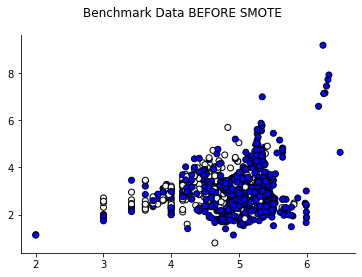

In [160]:
colors = ['blue' if v == 0 else '#f7f7f7' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data BEFORE SMOTE")
pass

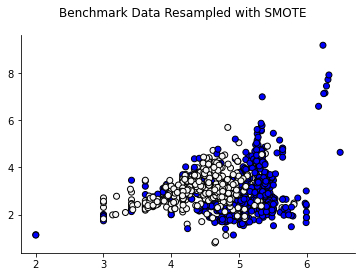

In [161]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['blue' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

In [162]:
y_resampled.value_counts()

0    699
1    699
Name: degradable, dtype: int64

In [163]:
#Joining the new dataset
dataset = pd.merge(X_resampled, y_resampled, left_index=True, right_index=True)

In [164]:
dataset

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919000,2.690900,0,0,0,0,0,31.400000,2,0,0,0.000000,3.106000,2.550000,9.002000,0,0.960000,1.142000,0,0,0,1.201000,0,0,0,0,1.932000,0.011000,0,0.000000,4.489000,0,0,0,0,2.949000,1.591000,0,7.253000,0,0,1
1,4.170000,2.114400,0,0,0,0,0,30.800000,1,1,0,0.000000,2.461000,1.393000,8.723000,1,0.989000,1.144000,0,0,0,1.104000,1,0,0,0,2.214000,-0.204000,0,0.000000,1.542000,0,0,0,0,3.315000,1.967000,0,7.257000,0,0,1
2,3.932000,3.251200,0,0,0,0,0,26.700000,2,4,0,0.000000,3.279000,2.585000,9.110000,0,1.009000,1.152000,0,0,0,1.092000,0,0,0,0,1.942000,-0.008000,0,0.000000,4.891000,0,0,0,1,3.076000,2.417000,0,7.601000,0,0,1
3,3.000000,2.709800,0,0,0,0,0,20.000000,0,2,0,0.000000,2.100000,0.918000,6.594000,0,1.108000,1.167000,0,0,0,1.024000,0,0,0,0,1.414000,1.073000,0,8.361000,1.333000,0,0,0,1,3.046000,5.000000,0,6.690000,0,0,1
4,4.236000,3.394400,0,0,0,0,0,29.400000,2,4,0,-0.271000,3.449000,2.753000,9.528000,2,1.004000,1.147000,0,0,0,1.137000,0,0,0,0,1.985000,-0.002000,0,10.348000,5.588000,0,0,0,0,3.351000,2.405000,0,8.003000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,3.954234,2.814769,0,0,0,0,0,31.498052,2,0,0,0.000000,3.497601,2.965095,9.367569,0,0.968490,1.142019,0,0,0,1.203179,0,0,0,0,1.960195,0.001471,0,0.000000,6.117233,0,0,0,0,3.259603,1.767036,0,7.936357,0,0,1
1394,4.749615,2.748765,0,0,0,0,0,33.014555,1,3,0,0.052461,4.022096,3.560088,10.366267,6,0.979026,1.138634,0,0,0,1.196045,0,0,0,0,2.178682,0.000000,0,11.360513,9.860314,0,0,0,0,3.516119,2.048033,0,8.560174,0,0,1
1395,4.557793,2.909640,1,0,0,0,1,46.700000,1,0,0,0.000000,3.249091,1.140644,9.394521,0,0.996299,1.105991,0,0,0,1.326280,1,0,1,0,2.150635,0.025842,0,0.000000,1.525914,0,0,0,0,3.764923,2.209961,0,8.447267,0,1,1
1396,3.324208,2.093084,0,0,0,0,0,22.449391,2,1,0,0.000000,2.070924,0.932686,7.149034,0,1.002711,1.161446,0,0,0,1.055566,0,0,0,0,1.534262,0.705461,0,0.000000,1.390914,0,0,0,1,2.760732,3.222420,0,6.115487,0,0,1


In [165]:
dataset.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [166]:
df.head()

molecular_descriptors,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [167]:
print('Not Degradable', round(dataset['degradable'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Degradable', round(dataset['degradable'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Not Degradable 50.0 % of the dataset
Degradable 50.0 % of the dataset


## Multicollinearity

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.
There's a known problem with variable

In the next step multicolinearity is checked. This becomes a problem when running Regression models. Thus, highly cocorrelated features (|r| > 0.90) will be dropped. When deciding which of two correlated features to keep, the one with the higher correlation to the traget and therefore higher prediction value will be keept.

In [168]:
dataset.corr()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
SpMax_L,1.000000,0.222191,0.289728,0.041918,0.215217,0.429893,0.459309,0.430105,0.186159,0.259434,0.216483,-0.089389,0.649402,-0.143747,0.905631,0.435329,0.264167,-0.191185,-0.090197,0.131853,0.225968,0.317601,0.194042,0.017885,0.174295,0.069039,0.923213,-0.022885,0.054449,0.273441,-0.047464,0.236173,0.342238,0.181935,0.053412,0.356399,0.053672,0.107904,0.543699,0.110533,0.340174,-0.443300
J_Dz(e),0.222191,1.000000,0.063665,-0.087886,-0.172830,0.327747,-0.239524,-0.266192,0.142823,0.186076,-0.133498,-0.202788,0.038751,0.269990,0.111333,0.109834,0.479494,0.403983,-0.031245,0.118027,0.300797,-0.226010,-0.213974,-0.004663,-0.005086,-0.132902,0.015057,-0.010757,-0.038276,0.133965,-0.039498,-0.192900,-0.100022,-0.168514,0.005688,0.090340,0.492026,-0.083590,0.091510,-0.082302,0.362431,-0.003969
nHM,0.289728,0.063665,1.000000,0.040430,0.045453,0.095812,0.299297,0.119947,-0.096245,-0.101296,0.028694,0.065973,0.463256,-0.119986,0.244146,-0.027144,0.355299,-0.322036,0.006772,-0.014826,0.156130,0.503812,0.105790,0.333876,0.564252,-0.031462,0.251665,0.001282,0.303776,-0.070669,-0.073624,0.216582,0.467555,0.014642,-0.092832,0.477226,0.029817,0.014433,0.573010,-0.039003,0.557718,-0.370082
F01[N-N],0.041918,-0.087886,0.040430,1.000000,0.453187,0.017445,0.202552,-0.021446,0.029942,0.025965,0.428252,-0.040529,0.094945,-0.071959,0.086680,0.012639,0.030305,0.058079,0.388239,0.028768,-0.016868,0.014377,0.048303,-0.025398,0.121339,0.312564,0.066275,-0.003462,-0.020631,0.109569,0.049599,-0.025805,0.224140,0.498696,0.132286,0.012123,0.014569,0.458553,0.058333,-0.013533,0.013536,-0.131485
F04[C-N],0.215217,-0.172830,0.045453,0.453187,1.000000,0.026027,0.395350,0.159985,0.018985,0.063699,0.874388,-0.068720,0.285088,-0.117641,0.303203,0.089391,0.017673,-0.054512,0.039573,0.228411,0.000659,0.128014,0.527172,-0.044561,0.133757,0.387199,0.285395,0.001583,-0.027981,0.254888,0.048410,-0.018072,0.356453,0.792380,0.214760,0.078663,-0.039789,0.751530,0.182385,-0.039710,0.008270,-0.293557
NssssC,0.429893,0.327747,0.095812,0.017445,0.026027,1.000000,0.108821,-0.034199,0.439176,0.032506,0.005515,-0.135091,0.262038,-0.027250,0.382893,0.129809,0.371532,0.442974,-0.016984,-0.025010,0.497702,-0.154025,0.042528,-0.000994,0.013298,0.003295,0.326199,0.002417,-0.017087,-0.022974,0.022752,0.231879,0.003612,-0.008205,0.030914,0.041847,0.251644,-0.041701,0.144350,-0.033629,0.682081,-0.213632
nCb-,0.459309,-0.239524,0.299297,0.202552,0.395350,0.108821,1.000000,0.597799,0.125621,0.091437,0.360549,-0.080580,0.508813,-0.320742,0.513883,0.281510,0.079187,-0.471872,-0.016100,0.201757,-0.030591,0.469767,0.284893,0.110481,0.312010,0.193473,0.537567,0.005181,0.181613,0.184886,-0.059196,-0.092666,0.805683,0.362872,0.126019,0.272687,-0.086200,0.227275,0.439587,0.124264,0.159975,-0.413142
C%,0.430105,-0.266192,0.119947,-0.021446,0.159985,-0.034199,0.597799,1.000000,-0.221091,-0.137696,0.128187,0.027416,0.375924,-0.362250,0.462309,0.095344,-0.087178,-0.717558,-0.112709,0.054351,-0.065556,0.671010,0.271106,0.047007,0.250926,0.133907,0.603106,0.007897,0.140032,0.038626,-0.136437,0.059735,0.400203,0.124736,-0.238003,0.194693,-0.273687,-0.050877,0.329024,0.126075,0.065273,-0.234969
nCp,0.186159,0.142823,-0.096245,0.029942,0.018985,0.439176,0.125621,-0.221091,1.000000,0.169947,-0.002221,0.082761,0.181961,0.245924,0.237729,0.303674,-0.233805,0.177864,-0.053077,-0.064062,0.052513,-0.107821,-0.054862,-0.024728,-0.119350,-0.015779,0.081410,-0.004073,-0.058355,0.003417,0.198991,-0.001395,-0.056954,-0.021184,0.011318,-0.012675,-0.193936,-0.088465,0.039991,-0.027591,-0.031700,-0.088461
nO,0.259434,0.186076,-0.101296,0.025965,0.063699,0.032506,0.091437,-0.137696,0.169947,1.000000,0.069920,-0.511064,0.362200,0.327330,

In [169]:
#get critical correlation values
dataset.corr().applymap(lambda x: x if abs(x)>.90 else "")

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
SpMax_L,1.0,,,,,,,,,,,,,,0.905631,,,,,,,,,,,,0.923213,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nO,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [170]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'degradable'],
      dtype='object', name='molecular_descriptors')

In [171]:
dataset = dataset.drop(columns=["SM6_L","SpMax_A","SM6_B(m)"])

In [172]:
dataset.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'F03[C-O]',
       'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 'nCIR',
       'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'Psi_i_1d', 'B04[C-Br]', 'SdO',
       'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A',
       'nN', 'nArCOOR', 'nX', 'degradable'],
      dtype='object')

In [173]:
dataset.corr().applymap(lambda x: x if abs(x)>.90 else "")

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,nArCOOR,nX,degradable
SpMax_L,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
J_Dz(e),,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nO,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [174]:
#df = dataset

corrmat = train.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, square=True)
plt.title('Correlation between features');
plt.show()

from sklearn.feature_selection import SelectKBest, f_classif
kBest = SelectKBest(f_classif, k = 30)
X_kBestFeatures = kBest.fit_transform(X_transform, y)
X_kBestFeatures.shape

<a name="Models">

### Models
---


#### 1) Query the website and return the html into the variable `page

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from xgboost import XGBClassifier 'can't download it on mac'
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import KFold


In [176]:
#list of models
knn3=KNeighborsClassifier(3)
knn5=KNeighborsClassifier(5)
sv=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
cat=CatBoostClassifier()
#clf_mlp = GridSearchCV(param_grid = param_grid, cv = 5)



models=[knn3, knn5, sv, gnb, dtc, rfc, ada, cat]

In [177]:
#definition of a function which compute metrics for dataframe in input for all model in models
def f_cross(df, n_splits=5):
    
    X=df.drop('degradable',axis=1)
    y=df.degradable
    
    res_cross={}
    kfold=KFold(n_splits=n_splits, shuffle=True, random_state=42)


    for model in models:
        list_of_accuracies=[]
        list_of_precision=[]
        list_of_recall=[]
        list_of_f1=[]
        for train, test in kfold.split(X):
            model.fit(X.iloc[train], y.iloc[train])
            list_of_accuracies.append(accuracy_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_precision.append(precision_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_recall.append(recall_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_f1.append(f1_score(y.iloc[test], model.predict(X.iloc[test])))
        res_cross[str(model).split("(")[0].split('.')[0].replace('<','')]=[round(np.mean(list_of_precision),3),
                                                                           round(np.mean(list_of_accuracies),3), 
                                            round(np.mean(list_of_recall),3), round(np.mean(list_of_f1),3)]
        list_of_precision2=[round(i,3) for i in list_of_precision]
        print(model, ':', list_of_precision2)
    
    #The datafrane res_cross contains all the metrics value for all the models
    res_cross=pd.DataFrame(res_cross).T
    res_cross.columns=['precision', 'accuracy', 'recall', 'f1' ]
    res_cross.sort_values(by='precision', ascending=False, inplace=True)
    
    
    #display precision for each model
    x=np.arange(len(res_cross.index))
    plt.bar(x, res_cross.precision, color = (0,0.6,0.5,0.8), edgecolor='black')
    plt.xticks(x, res_cross.index, rotation=35,horizontalalignment='right', fontsize=12)
    plt.title('Precisions', fontsize=13)
    for i in range(len(res_cross.precision)):
        plt.text(x = i-0.3, y = res_cross.precision[i]+0.01, s = res_cross.precision[i])
    plt.show()
    
    return res_cross

KNeighborsClassifier(n_neighbors=3) : [0.771, 0.686, 0.69, 0.757, 0.662]
KNeighborsClassifier() : [0.729, 0.653, 0.682, 0.771, 0.667]
SVC() : [0.807, 0.75, 0.734, 0.857, 0.727]
GaussianNB() : [0.627, 0.534, 0.538, 0.523, 0.5]
DecisionTreeClassifier() : [0.738, 0.648, 0.644, 0.765, 0.629]
RandomForestClassifier() : [0.873, 0.878, 0.803, 0.877, 0.828]
AdaBoostClassifier() : [0.802, 0.735, 0.809, 0.814, 0.803]
Learning rate set to 0.009583
0:	learn: 0.6870788	total: 6.68ms	remaining: 6.67s
1:	learn: 0.6802647	total: 9.2ms	remaining: 4.59s
2:	learn: 0.6734981	total: 11.7ms	remaining: 3.88s
3:	learn: 0.6680056	total: 14.1ms	remaining: 3.52s
4:	learn: 0.6613916	total: 16.4ms	remaining: 3.26s
5:	learn: 0.6545821	total: 18.8ms	remaining: 3.11s
6:	learn: 0.6485807	total: 21.1ms	remaining: 2.99s
7:	learn: 0.6431125	total: 23.3ms	remaining: 2.89s
8:	learn: 0.6381424	total: 26.1ms	remaining: 2.87s
9:	learn: 0.6320786	total: 28.7ms	remaining: 2.84s
10:	learn: 0.6270199	total: 31.6ms	remaining: 2.84

204:	learn: 0.2948264	total: 553ms	remaining: 2.14s
205:	learn: 0.2942040	total: 557ms	remaining: 2.15s
206:	learn: 0.2935729	total: 562ms	remaining: 2.15s
207:	learn: 0.2931489	total: 567ms	remaining: 2.16s
208:	learn: 0.2925570	total: 572ms	remaining: 2.16s
209:	learn: 0.2920508	total: 574ms	remaining: 2.16s
210:	learn: 0.2915297	total: 576ms	remaining: 2.15s
211:	learn: 0.2909713	total: 579ms	remaining: 2.15s
212:	learn: 0.2905861	total: 581ms	remaining: 2.15s
213:	learn: 0.2899345	total: 584ms	remaining: 2.15s
214:	learn: 0.2894182	total: 587ms	remaining: 2.14s
215:	learn: 0.2889098	total: 589ms	remaining: 2.14s
216:	learn: 0.2884264	total: 591ms	remaining: 2.13s
217:	learn: 0.2877450	total: 593ms	remaining: 2.13s
218:	learn: 0.2868487	total: 596ms	remaining: 2.13s
219:	learn: 0.2864476	total: 599ms	remaining: 2.12s
220:	learn: 0.2859240	total: 602ms	remaining: 2.12s
221:	learn: 0.2854521	total: 605ms	remaining: 2.12s
222:	learn: 0.2849666	total: 608ms	remaining: 2.12s
223:	learn: 

421:	learn: 0.2222678	total: 1.14s	remaining: 1.56s
422:	learn: 0.2218965	total: 1.14s	remaining: 1.56s
423:	learn: 0.2216770	total: 1.16s	remaining: 1.57s
424:	learn: 0.2214589	total: 1.16s	remaining: 1.57s
425:	learn: 0.2212209	total: 1.17s	remaining: 1.57s
426:	learn: 0.2210333	total: 1.18s	remaining: 1.58s
427:	learn: 0.2207622	total: 1.18s	remaining: 1.57s
428:	learn: 0.2205077	total: 1.18s	remaining: 1.57s
429:	learn: 0.2202442	total: 1.19s	remaining: 1.57s
430:	learn: 0.2200282	total: 1.19s	remaining: 1.58s
431:	learn: 0.2197408	total: 1.2s	remaining: 1.57s
432:	learn: 0.2195868	total: 1.2s	remaining: 1.57s
433:	learn: 0.2194074	total: 1.2s	remaining: 1.57s
434:	learn: 0.2192099	total: 1.21s	remaining: 1.57s
435:	learn: 0.2189707	total: 1.21s	remaining: 1.56s
436:	learn: 0.2186487	total: 1.21s	remaining: 1.56s
437:	learn: 0.2184470	total: 1.22s	remaining: 1.56s
438:	learn: 0.2181925	total: 1.22s	remaining: 1.56s
439:	learn: 0.2179282	total: 1.22s	remaining: 1.56s
440:	learn: 0.2

593:	learn: 0.1879257	total: 1.72s	remaining: 1.18s
594:	learn: 0.1876636	total: 1.73s	remaining: 1.18s
595:	learn: 0.1875244	total: 1.73s	remaining: 1.17s
596:	learn: 0.1873651	total: 1.74s	remaining: 1.17s
597:	learn: 0.1872368	total: 1.74s	remaining: 1.17s
598:	learn: 0.1870325	total: 1.74s	remaining: 1.17s
599:	learn: 0.1868981	total: 1.74s	remaining: 1.16s
600:	learn: 0.1867198	total: 1.75s	remaining: 1.16s
601:	learn: 0.1865685	total: 1.75s	remaining: 1.16s
602:	learn: 0.1863472	total: 1.75s	remaining: 1.15s
603:	learn: 0.1862337	total: 1.75s	remaining: 1.15s
604:	learn: 0.1859352	total: 1.76s	remaining: 1.15s
605:	learn: 0.1856641	total: 1.76s	remaining: 1.14s
606:	learn: 0.1854731	total: 1.77s	remaining: 1.15s
607:	learn: 0.1854147	total: 1.78s	remaining: 1.15s
608:	learn: 0.1852473	total: 1.78s	remaining: 1.15s
609:	learn: 0.1850128	total: 1.79s	remaining: 1.15s
610:	learn: 0.1847847	total: 1.8s	remaining: 1.14s
611:	learn: 0.1845206	total: 1.8s	remaining: 1.14s
612:	learn: 0.

776:	learn: 0.1568024	total: 2.3s	remaining: 662ms
777:	learn: 0.1565373	total: 2.31s	remaining: 659ms
778:	learn: 0.1563280	total: 2.31s	remaining: 657ms
779:	learn: 0.1561469	total: 2.32s	remaining: 655ms
780:	learn: 0.1559985	total: 2.32s	remaining: 651ms
781:	learn: 0.1558325	total: 2.33s	remaining: 648ms
782:	learn: 0.1556550	total: 2.33s	remaining: 645ms
783:	learn: 0.1555257	total: 2.33s	remaining: 642ms
784:	learn: 0.1554232	total: 2.33s	remaining: 639ms
785:	learn: 0.1552391	total: 2.34s	remaining: 636ms
786:	learn: 0.1549086	total: 2.34s	remaining: 633ms
787:	learn: 0.1547451	total: 2.34s	remaining: 630ms
788:	learn: 0.1545733	total: 2.34s	remaining: 627ms
789:	learn: 0.1543821	total: 2.35s	remaining: 624ms
790:	learn: 0.1542503	total: 2.35s	remaining: 620ms
791:	learn: 0.1541413	total: 2.35s	remaining: 617ms
792:	learn: 0.1539758	total: 2.35s	remaining: 614ms
793:	learn: 0.1537651	total: 2.36s	remaining: 611ms
794:	learn: 0.1536606	total: 2.36s	remaining: 608ms
795:	learn: 0

985:	learn: 0.1267359	total: 2.89s	remaining: 41.1ms
986:	learn: 0.1266050	total: 2.9s	remaining: 38.2ms
987:	learn: 0.1264465	total: 2.9s	remaining: 35.2ms
988:	learn: 0.1264108	total: 2.91s	remaining: 32.3ms
989:	learn: 0.1262403	total: 2.91s	remaining: 29.4ms
990:	learn: 0.1261338	total: 2.91s	remaining: 26.5ms
991:	learn: 0.1259950	total: 2.92s	remaining: 23.5ms
992:	learn: 0.1259452	total: 2.92s	remaining: 20.6ms
993:	learn: 0.1257707	total: 2.92s	remaining: 17.6ms
994:	learn: 0.1257177	total: 2.92s	remaining: 14.7ms
995:	learn: 0.1256260	total: 2.93s	remaining: 11.8ms
996:	learn: 0.1254839	total: 2.93s	remaining: 8.81ms
997:	learn: 0.1253628	total: 2.93s	remaining: 5.88ms
998:	learn: 0.1251547	total: 2.93s	remaining: 2.94ms
999:	learn: 0.1250913	total: 2.94s	remaining: 0us
Learning rate set to 0.009583
0:	learn: 0.6861121	total: 4.27ms	remaining: 4.27s
1:	learn: 0.6796881	total: 6.82ms	remaining: 3.4s
2:	learn: 0.6738925	total: 10.5ms	remaining: 3.48s
3:	learn: 0.6684489	total: 1

171:	learn: 0.3068059	total: 508ms	remaining: 2.44s
172:	learn: 0.3059190	total: 513ms	remaining: 2.45s
173:	learn: 0.3052445	total: 517ms	remaining: 2.46s
174:	learn: 0.3043653	total: 521ms	remaining: 2.46s
175:	learn: 0.3035936	total: 523ms	remaining: 2.45s
176:	learn: 0.3026771	total: 526ms	remaining: 2.44s
177:	learn: 0.3020698	total: 529ms	remaining: 2.44s
178:	learn: 0.3013960	total: 531ms	remaining: 2.44s
179:	learn: 0.3009379	total: 534ms	remaining: 2.43s
180:	learn: 0.3003811	total: 537ms	remaining: 2.43s
181:	learn: 0.2997470	total: 539ms	remaining: 2.42s
182:	learn: 0.2990754	total: 541ms	remaining: 2.42s
183:	learn: 0.2985473	total: 544ms	remaining: 2.41s
184:	learn: 0.2979270	total: 547ms	remaining: 2.41s
185:	learn: 0.2974654	total: 549ms	remaining: 2.4s
186:	learn: 0.2968954	total: 552ms	remaining: 2.4s
187:	learn: 0.2960178	total: 554ms	remaining: 2.39s
188:	learn: 0.2954050	total: 557ms	remaining: 2.39s
189:	learn: 0.2948693	total: 560ms	remaining: 2.39s
190:	learn: 0.

371:	learn: 0.2253121	total: 1.09s	remaining: 1.84s
372:	learn: 0.2250473	total: 1.1s	remaining: 1.86s
373:	learn: 0.2246558	total: 1.12s	remaining: 1.87s
374:	learn: 0.2244910	total: 1.12s	remaining: 1.87s
375:	learn: 0.2240865	total: 1.13s	remaining: 1.87s
376:	learn: 0.2237822	total: 1.13s	remaining: 1.87s
377:	learn: 0.2234515	total: 1.14s	remaining: 1.87s
378:	learn: 0.2232551	total: 1.14s	remaining: 1.87s
379:	learn: 0.2230660	total: 1.15s	remaining: 1.87s
380:	learn: 0.2227399	total: 1.15s	remaining: 1.87s
381:	learn: 0.2224398	total: 1.16s	remaining: 1.88s
382:	learn: 0.2222890	total: 1.16s	remaining: 1.87s
383:	learn: 0.2220828	total: 1.17s	remaining: 1.88s
384:	learn: 0.2218700	total: 1.17s	remaining: 1.88s
385:	learn: 0.2215348	total: 1.18s	remaining: 1.88s
386:	learn: 0.2213188	total: 1.19s	remaining: 1.88s
387:	learn: 0.2209670	total: 1.19s	remaining: 1.88s
388:	learn: 0.2207544	total: 1.2s	remaining: 1.88s
389:	learn: 0.2205418	total: 1.2s	remaining: 1.88s
390:	learn: 0.2

539:	learn: 0.1876601	total: 1.67s	remaining: 1.42s
540:	learn: 0.1875400	total: 1.67s	remaining: 1.42s
541:	learn: 0.1872344	total: 1.68s	remaining: 1.42s
542:	learn: 0.1870642	total: 1.68s	remaining: 1.42s
543:	learn: 0.1869105	total: 1.69s	remaining: 1.42s
544:	learn: 0.1867755	total: 1.69s	remaining: 1.41s
545:	learn: 0.1864833	total: 1.69s	remaining: 1.41s
546:	learn: 0.1863573	total: 1.7s	remaining: 1.4s
547:	learn: 0.1861740	total: 1.7s	remaining: 1.4s
548:	learn: 0.1859539	total: 1.7s	remaining: 1.4s
549:	learn: 0.1858122	total: 1.71s	remaining: 1.4s
550:	learn: 0.1855286	total: 1.71s	remaining: 1.39s
551:	learn: 0.1854112	total: 1.71s	remaining: 1.39s
552:	learn: 0.1852204	total: 1.71s	remaining: 1.39s
553:	learn: 0.1851314	total: 1.72s	remaining: 1.38s
554:	learn: 0.1847350	total: 1.72s	remaining: 1.38s
555:	learn: 0.1845818	total: 1.72s	remaining: 1.38s
556:	learn: 0.1844495	total: 1.73s	remaining: 1.37s
557:	learn: 0.1841933	total: 1.73s	remaining: 1.37s
558:	learn: 0.18390

741:	learn: 0.1522458	total: 2.25s	remaining: 784ms
742:	learn: 0.1521086	total: 2.26s	remaining: 782ms
743:	learn: 0.1519322	total: 2.26s	remaining: 779ms
744:	learn: 0.1517425	total: 2.27s	remaining: 777ms
745:	learn: 0.1516985	total: 2.27s	remaining: 773ms
746:	learn: 0.1515763	total: 2.27s	remaining: 770ms
747:	learn: 0.1515338	total: 2.28s	remaining: 767ms
748:	learn: 0.1513465	total: 2.28s	remaining: 764ms
749:	learn: 0.1511937	total: 2.28s	remaining: 760ms
750:	learn: 0.1510316	total: 2.28s	remaining: 757ms
751:	learn: 0.1509469	total: 2.29s	remaining: 754ms
752:	learn: 0.1507629	total: 2.29s	remaining: 751ms
753:	learn: 0.1506630	total: 2.29s	remaining: 748ms
754:	learn: 0.1505133	total: 2.29s	remaining: 745ms
755:	learn: 0.1503452	total: 2.3s	remaining: 741ms
756:	learn: 0.1501565	total: 2.3s	remaining: 738ms
757:	learn: 0.1499868	total: 2.3s	remaining: 735ms
758:	learn: 0.1496974	total: 2.3s	remaining: 732ms
759:	learn: 0.1495769	total: 2.31s	remaining: 729ms
760:	learn: 0.14

950:	learn: 0.1250893	total: 2.84s	remaining: 146ms
951:	learn: 0.1249500	total: 2.85s	remaining: 144ms
952:	learn: 0.1247935	total: 2.85s	remaining: 141ms
953:	learn: 0.1246533	total: 2.86s	remaining: 138ms
954:	learn: 0.1246281	total: 2.86s	remaining: 135ms
955:	learn: 0.1244449	total: 2.86s	remaining: 132ms
956:	learn: 0.1243185	total: 2.86s	remaining: 129ms
957:	learn: 0.1241755	total: 2.87s	remaining: 126ms
958:	learn: 0.1241361	total: 2.87s	remaining: 123ms
959:	learn: 0.1239947	total: 2.87s	remaining: 120ms
960:	learn: 0.1238821	total: 2.88s	remaining: 117ms
961:	learn: 0.1238542	total: 2.88s	remaining: 114ms
962:	learn: 0.1236673	total: 2.88s	remaining: 111ms
963:	learn: 0.1235316	total: 2.88s	remaining: 108ms
964:	learn: 0.1233945	total: 2.89s	remaining: 105ms
965:	learn: 0.1232548	total: 2.89s	remaining: 102ms
966:	learn: 0.1231008	total: 2.89s	remaining: 98.8ms
967:	learn: 0.1230302	total: 2.9s	remaining: 95.8ms
968:	learn: 0.1228352	total: 2.9s	remaining: 92.8ms
969:	learn:

137:	learn: 0.3313174	total: 401ms	remaining: 2.51s
138:	learn: 0.3304783	total: 406ms	remaining: 2.52s
139:	learn: 0.3294655	total: 411ms	remaining: 2.53s
140:	learn: 0.3287079	total: 416ms	remaining: 2.54s
141:	learn: 0.3274285	total: 418ms	remaining: 2.53s
142:	learn: 0.3265775	total: 422ms	remaining: 2.53s
143:	learn: 0.3255951	total: 424ms	remaining: 2.52s
144:	learn: 0.3250532	total: 427ms	remaining: 2.52s
145:	learn: 0.3242978	total: 430ms	remaining: 2.51s
146:	learn: 0.3234361	total: 432ms	remaining: 2.51s
147:	learn: 0.3224818	total: 435ms	remaining: 2.5s
148:	learn: 0.3218157	total: 438ms	remaining: 2.5s
149:	learn: 0.3210987	total: 440ms	remaining: 2.49s
150:	learn: 0.3203559	total: 443ms	remaining: 2.49s
151:	learn: 0.3196314	total: 445ms	remaining: 2.48s
152:	learn: 0.3190104	total: 448ms	remaining: 2.48s
153:	learn: 0.3182303	total: 451ms	remaining: 2.47s
154:	learn: 0.3172771	total: 453ms	remaining: 2.47s
155:	learn: 0.3165752	total: 455ms	remaining: 2.46s
156:	learn: 0.

348:	learn: 0.2295583	total: 989ms	remaining: 1.84s
349:	learn: 0.2291421	total: 991ms	remaining: 1.84s
350:	learn: 0.2288792	total: 993ms	remaining: 1.84s
351:	learn: 0.2285362	total: 995ms	remaining: 1.83s
352:	learn: 0.2281813	total: 998ms	remaining: 1.83s
353:	learn: 0.2280687	total: 1s	remaining: 1.82s
354:	learn: 0.2278288	total: 1s	remaining: 1.82s
355:	learn: 0.2275986	total: 1.01s	remaining: 1.82s
356:	learn: 0.2272633	total: 1.01s	remaining: 1.82s
357:	learn: 0.2271409	total: 1.01s	remaining: 1.81s
358:	learn: 0.2269752	total: 1.01s	remaining: 1.81s
359:	learn: 0.2267109	total: 1.02s	remaining: 1.81s
360:	learn: 0.2263750	total: 1.02s	remaining: 1.8s
361:	learn: 0.2261413	total: 1.02s	remaining: 1.8s
362:	learn: 0.2257552	total: 1.02s	remaining: 1.8s
363:	learn: 0.2254773	total: 1.03s	remaining: 1.79s
364:	learn: 0.2251614	total: 1.03s	remaining: 1.79s
365:	learn: 0.2247574	total: 1.03s	remaining: 1.79s
366:	learn: 0.2244686	total: 1.04s	remaining: 1.79s
367:	learn: 0.2242710

528:	learn: 0.1874003	total: 1.56s	remaining: 1.39s
529:	learn: 0.1872606	total: 1.57s	remaining: 1.39s
530:	learn: 0.1869811	total: 1.57s	remaining: 1.39s
531:	learn: 0.1868229	total: 1.57s	remaining: 1.38s
532:	learn: 0.1867021	total: 1.57s	remaining: 1.38s
533:	learn: 0.1864988	total: 1.58s	remaining: 1.38s
534:	learn: 0.1864415	total: 1.58s	remaining: 1.37s
535:	learn: 0.1862020	total: 1.58s	remaining: 1.37s
536:	learn: 0.1860325	total: 1.58s	remaining: 1.37s
537:	learn: 0.1857974	total: 1.59s	remaining: 1.36s
538:	learn: 0.1856476	total: 1.59s	remaining: 1.36s
539:	learn: 0.1854754	total: 1.59s	remaining: 1.36s
540:	learn: 0.1852947	total: 1.59s	remaining: 1.35s
541:	learn: 0.1851921	total: 1.6s	remaining: 1.35s
542:	learn: 0.1848903	total: 1.6s	remaining: 1.35s
543:	learn: 0.1847738	total: 1.6s	remaining: 1.34s
544:	learn: 0.1845255	total: 1.6s	remaining: 1.34s
545:	learn: 0.1841407	total: 1.61s	remaining: 1.34s
546:	learn: 0.1839440	total: 1.61s	remaining: 1.33s
547:	learn: 0.18

743:	learn: 0.1472738	total: 2.15s	remaining: 739ms
744:	learn: 0.1470550	total: 2.15s	remaining: 737ms
745:	learn: 0.1468226	total: 2.15s	remaining: 734ms
746:	learn: 0.1467431	total: 2.16s	remaining: 731ms
747:	learn: 0.1466182	total: 2.16s	remaining: 728ms
748:	learn: 0.1464982	total: 2.16s	remaining: 725ms
749:	learn: 0.1463229	total: 2.17s	remaining: 722ms
750:	learn: 0.1461536	total: 2.17s	remaining: 719ms
751:	learn: 0.1460238	total: 2.17s	remaining: 716ms
752:	learn: 0.1458485	total: 2.17s	remaining: 713ms
753:	learn: 0.1456941	total: 2.18s	remaining: 710ms
754:	learn: 0.1455839	total: 2.18s	remaining: 708ms
755:	learn: 0.1454073	total: 2.19s	remaining: 706ms
756:	learn: 0.1453665	total: 2.19s	remaining: 703ms
757:	learn: 0.1452768	total: 2.19s	remaining: 700ms
758:	learn: 0.1450195	total: 2.19s	remaining: 697ms
759:	learn: 0.1448367	total: 2.2s	remaining: 694ms
760:	learn: 0.1446661	total: 2.2s	remaining: 691ms
761:	learn: 0.1444773	total: 2.2s	remaining: 688ms
762:	learn: 0.1

954:	learn: 0.1166804	total: 2.73s	remaining: 129ms
955:	learn: 0.1165990	total: 2.74s	remaining: 126ms
956:	learn: 0.1164997	total: 2.75s	remaining: 123ms
957:	learn: 0.1163395	total: 2.75s	remaining: 121ms
958:	learn: 0.1161339	total: 2.76s	remaining: 118ms
959:	learn: 0.1161237	total: 2.76s	remaining: 115ms
960:	learn: 0.1160236	total: 2.77s	remaining: 112ms
961:	learn: 0.1158378	total: 2.78s	remaining: 110ms
962:	learn: 0.1157038	total: 2.79s	remaining: 107ms
963:	learn: 0.1156502	total: 2.79s	remaining: 104ms
964:	learn: 0.1155189	total: 2.8s	remaining: 101ms
965:	learn: 0.1154104	total: 2.8s	remaining: 98.7ms
966:	learn: 0.1153392	total: 2.81s	remaining: 95.8ms
967:	learn: 0.1152757	total: 2.81s	remaining: 93.1ms
968:	learn: 0.1151324	total: 2.82s	remaining: 90.4ms
969:	learn: 0.1149786	total: 2.83s	remaining: 87.5ms
970:	learn: 0.1148791	total: 2.83s	remaining: 84.6ms
971:	learn: 0.1147459	total: 2.84s	remaining: 81.8ms
972:	learn: 0.1146434	total: 2.85s	remaining: 79ms
973:	lea

184:	learn: 0.3018707	total: 522ms	remaining: 2.3s
185:	learn: 0.3014420	total: 526ms	remaining: 2.3s
186:	learn: 0.3009012	total: 528ms	remaining: 2.3s
187:	learn: 0.3002577	total: 531ms	remaining: 2.29s
188:	learn: 0.2997959	total: 533ms	remaining: 2.29s
189:	learn: 0.2992461	total: 537ms	remaining: 2.29s
190:	learn: 0.2987574	total: 540ms	remaining: 2.29s
191:	learn: 0.2982267	total: 542ms	remaining: 2.28s
192:	learn: 0.2975528	total: 545ms	remaining: 2.28s
193:	learn: 0.2968912	total: 548ms	remaining: 2.27s
194:	learn: 0.2962859	total: 550ms	remaining: 2.27s
195:	learn: 0.2957464	total: 553ms	remaining: 2.27s
196:	learn: 0.2948809	total: 555ms	remaining: 2.26s
197:	learn: 0.2942736	total: 558ms	remaining: 2.26s
198:	learn: 0.2937287	total: 562ms	remaining: 2.26s
199:	learn: 0.2932249	total: 564ms	remaining: 2.26s
200:	learn: 0.2926493	total: 567ms	remaining: 2.25s
201:	learn: 0.2921258	total: 569ms	remaining: 2.25s
202:	learn: 0.2913450	total: 572ms	remaining: 2.25s
203:	learn: 0.2

392:	learn: 0.2232885	total: 1.11s	remaining: 1.71s
393:	learn: 0.2230068	total: 1.11s	remaining: 1.71s
394:	learn: 0.2226107	total: 1.12s	remaining: 1.71s
395:	learn: 0.2224096	total: 1.12s	remaining: 1.71s
396:	learn: 0.2221627	total: 1.12s	remaining: 1.71s
397:	learn: 0.2219355	total: 1.13s	remaining: 1.7s
398:	learn: 0.2215822	total: 1.13s	remaining: 1.7s
399:	learn: 0.2214335	total: 1.13s	remaining: 1.7s
400:	learn: 0.2212352	total: 1.13s	remaining: 1.69s
401:	learn: 0.2209571	total: 1.14s	remaining: 1.69s
402:	learn: 0.2207324	total: 1.14s	remaining: 1.69s
403:	learn: 0.2205686	total: 1.14s	remaining: 1.68s
404:	learn: 0.2203481	total: 1.14s	remaining: 1.68s
405:	learn: 0.2199184	total: 1.15s	remaining: 1.68s
406:	learn: 0.2196012	total: 1.15s	remaining: 1.68s
407:	learn: 0.2193112	total: 1.15s	remaining: 1.67s
408:	learn: 0.2191422	total: 1.16s	remaining: 1.67s
409:	learn: 0.2187908	total: 1.16s	remaining: 1.67s
410:	learn: 0.2185307	total: 1.16s	remaining: 1.66s
411:	learn: 0.2

600:	learn: 0.1779194	total: 1.7s	remaining: 1.13s
601:	learn: 0.1778790	total: 1.71s	remaining: 1.13s
602:	learn: 0.1777133	total: 1.71s	remaining: 1.13s
603:	learn: 0.1774305	total: 1.71s	remaining: 1.12s
604:	learn: 0.1773244	total: 1.72s	remaining: 1.12s
605:	learn: 0.1771667	total: 1.72s	remaining: 1.12s
606:	learn: 0.1770888	total: 1.72s	remaining: 1.11s
607:	learn: 0.1768891	total: 1.72s	remaining: 1.11s
608:	learn: 0.1767551	total: 1.73s	remaining: 1.11s
609:	learn: 0.1765500	total: 1.73s	remaining: 1.11s
610:	learn: 0.1762670	total: 1.73s	remaining: 1.1s
611:	learn: 0.1761003	total: 1.74s	remaining: 1.1s
612:	learn: 0.1760776	total: 1.74s	remaining: 1.1s
613:	learn: 0.1759607	total: 1.74s	remaining: 1.09s
614:	learn: 0.1757443	total: 1.74s	remaining: 1.09s
615:	learn: 0.1755480	total: 1.75s	remaining: 1.09s
616:	learn: 0.1753783	total: 1.75s	remaining: 1.08s
617:	learn: 0.1750663	total: 1.75s	remaining: 1.08s
618:	learn: 0.1749489	total: 1.75s	remaining: 1.08s
619:	learn: 0.17

817:	learn: 0.1411949	total: 2.29s	remaining: 510ms
818:	learn: 0.1411574	total: 2.3s	remaining: 507ms
819:	learn: 0.1410075	total: 2.3s	remaining: 505ms
820:	learn: 0.1407395	total: 2.3s	remaining: 502ms
821:	learn: 0.1405492	total: 2.3s	remaining: 499ms
822:	learn: 0.1403873	total: 2.31s	remaining: 496ms
823:	learn: 0.1403772	total: 2.31s	remaining: 493ms
824:	learn: 0.1401618	total: 2.31s	remaining: 490ms
825:	learn: 0.1401054	total: 2.31s	remaining: 488ms
826:	learn: 0.1400417	total: 2.32s	remaining: 485ms
827:	learn: 0.1399182	total: 2.32s	remaining: 482ms
828:	learn: 0.1397598	total: 2.32s	remaining: 479ms
829:	learn: 0.1396926	total: 2.32s	remaining: 476ms
830:	learn: 0.1395513	total: 2.33s	remaining: 473ms
831:	learn: 0.1394154	total: 2.33s	remaining: 470ms
832:	learn: 0.1392199	total: 2.33s	remaining: 468ms
833:	learn: 0.1390858	total: 2.33s	remaining: 465ms
834:	learn: 0.1388641	total: 2.34s	remaining: 462ms
835:	learn: 0.1385829	total: 2.34s	remaining: 459ms
836:	learn: 0.13

19:	learn: 0.5770877	total: 53.6ms	remaining: 2.63s
20:	learn: 0.5720461	total: 56.7ms	remaining: 2.64s
21:	learn: 0.5674228	total: 59.5ms	remaining: 2.64s
22:	learn: 0.5635060	total: 61.7ms	remaining: 2.62s
23:	learn: 0.5588910	total: 63.8ms	remaining: 2.59s
24:	learn: 0.5540967	total: 66.4ms	remaining: 2.59s
25:	learn: 0.5490957	total: 69ms	remaining: 2.59s
26:	learn: 0.5444128	total: 71.6ms	remaining: 2.58s
27:	learn: 0.5392275	total: 75.2ms	remaining: 2.61s
28:	learn: 0.5349705	total: 78.1ms	remaining: 2.62s
29:	learn: 0.5305867	total: 80.4ms	remaining: 2.6s
30:	learn: 0.5255601	total: 82.7ms	remaining: 2.58s
31:	learn: 0.5213402	total: 85ms	remaining: 2.57s
32:	learn: 0.5172144	total: 87.5ms	remaining: 2.56s
33:	learn: 0.5128998	total: 90ms	remaining: 2.56s
34:	learn: 0.5094253	total: 92.3ms	remaining: 2.54s
35:	learn: 0.5062150	total: 94.6ms	remaining: 2.53s
36:	learn: 0.5031310	total: 97.6ms	remaining: 2.54s
37:	learn: 0.4991870	total: 101ms	remaining: 2.55s
38:	learn: 0.4957321

194:	learn: 0.2805002	total: 842ms	remaining: 3.47s
195:	learn: 0.2800592	total: 846ms	remaining: 3.47s
196:	learn: 0.2797673	total: 848ms	remaining: 3.46s
197:	learn: 0.2793496	total: 850ms	remaining: 3.44s
198:	learn: 0.2789693	total: 854ms	remaining: 3.44s
199:	learn: 0.2782437	total: 856ms	remaining: 3.42s
200:	learn: 0.2777753	total: 859ms	remaining: 3.41s
201:	learn: 0.2773413	total: 862ms	remaining: 3.4s
202:	learn: 0.2769207	total: 865ms	remaining: 3.4s
203:	learn: 0.2764487	total: 868ms	remaining: 3.39s
204:	learn: 0.2761484	total: 871ms	remaining: 3.38s
205:	learn: 0.2755824	total: 874ms	remaining: 3.37s
206:	learn: 0.2751856	total: 877ms	remaining: 3.36s
207:	learn: 0.2746292	total: 880ms	remaining: 3.35s
208:	learn: 0.2742560	total: 882ms	remaining: 3.34s
209:	learn: 0.2737734	total: 885ms	remaining: 3.33s
210:	learn: 0.2733168	total: 887ms	remaining: 3.32s
211:	learn: 0.2730245	total: 890ms	remaining: 3.31s
212:	learn: 0.2724859	total: 893ms	remaining: 3.3s
213:	learn: 0.2

403:	learn: 0.2090633	total: 1.43s	remaining: 2.11s
404:	learn: 0.2087914	total: 1.44s	remaining: 2.11s
405:	learn: 0.2083911	total: 1.44s	remaining: 2.11s
406:	learn: 0.2080621	total: 1.45s	remaining: 2.11s
407:	learn: 0.2079012	total: 1.45s	remaining: 2.11s
408:	learn: 0.2077355	total: 1.46s	remaining: 2.11s
409:	learn: 0.2074970	total: 1.47s	remaining: 2.11s
410:	learn: 0.2071391	total: 1.47s	remaining: 2.11s
411:	learn: 0.2069910	total: 1.48s	remaining: 2.11s
412:	learn: 0.2067543	total: 1.48s	remaining: 2.11s
413:	learn: 0.2065910	total: 1.49s	remaining: 2.11s
414:	learn: 0.2062691	total: 1.49s	remaining: 2.1s
415:	learn: 0.2059837	total: 1.49s	remaining: 2.1s
416:	learn: 0.2057169	total: 1.5s	remaining: 2.09s
417:	learn: 0.2054622	total: 1.5s	remaining: 2.09s
418:	learn: 0.2053371	total: 1.5s	remaining: 2.08s
419:	learn: 0.2050976	total: 1.51s	remaining: 2.08s
420:	learn: 0.2048041	total: 1.51s	remaining: 2.08s
421:	learn: 0.2045256	total: 1.51s	remaining: 2.07s
422:	learn: 0.204

604:	learn: 0.1672524	total: 2.02s	remaining: 1.32s
605:	learn: 0.1671550	total: 2.02s	remaining: 1.31s
606:	learn: 0.1668302	total: 2.02s	remaining: 1.31s
607:	learn: 0.1666177	total: 2.03s	remaining: 1.31s
608:	learn: 0.1664496	total: 2.03s	remaining: 1.3s
609:	learn: 0.1662802	total: 2.03s	remaining: 1.3s
610:	learn: 0.1661418	total: 2.04s	remaining: 1.3s
611:	learn: 0.1660306	total: 2.04s	remaining: 1.29s
612:	learn: 0.1657204	total: 2.04s	remaining: 1.29s
613:	learn: 0.1655651	total: 2.04s	remaining: 1.28s
614:	learn: 0.1652993	total: 2.05s	remaining: 1.28s
615:	learn: 0.1652066	total: 2.05s	remaining: 1.28s
616:	learn: 0.1650296	total: 2.05s	remaining: 1.27s
617:	learn: 0.1649380	total: 2.06s	remaining: 1.27s
618:	learn: 0.1647628	total: 2.06s	remaining: 1.27s
619:	learn: 0.1645173	total: 2.06s	remaining: 1.26s
620:	learn: 0.1643685	total: 2.06s	remaining: 1.26s
621:	learn: 0.1641873	total: 2.07s	remaining: 1.26s
622:	learn: 0.1640096	total: 2.07s	remaining: 1.25s
623:	learn: 0.1

808:	learn: 0.1316306	total: 2.61s	remaining: 616ms
809:	learn: 0.1316032	total: 2.61s	remaining: 612ms
810:	learn: 0.1314154	total: 2.61s	remaining: 609ms
811:	learn: 0.1312525	total: 2.62s	remaining: 606ms
812:	learn: 0.1309379	total: 2.62s	remaining: 602ms
813:	learn: 0.1308437	total: 2.62s	remaining: 599ms
814:	learn: 0.1307113	total: 2.62s	remaining: 596ms
815:	learn: 0.1305209	total: 2.63s	remaining: 592ms
816:	learn: 0.1303725	total: 2.63s	remaining: 589ms
817:	learn: 0.1301285	total: 2.63s	remaining: 585ms
818:	learn: 0.1300130	total: 2.63s	remaining: 582ms
819:	learn: 0.1299997	total: 2.64s	remaining: 579ms
820:	learn: 0.1299540	total: 2.64s	remaining: 575ms
821:	learn: 0.1298041	total: 2.64s	remaining: 572ms
822:	learn: 0.1294920	total: 2.64s	remaining: 569ms
823:	learn: 0.1294760	total: 2.65s	remaining: 565ms
824:	learn: 0.1293659	total: 2.65s	remaining: 562ms
825:	learn: 0.1292312	total: 2.65s	remaining: 559ms
826:	learn: 0.1290099	total: 2.66s	remaining: 556ms
827:	learn: 

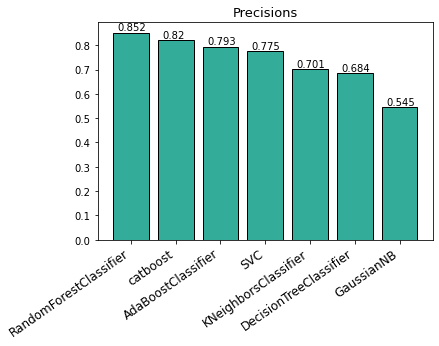

,precision,accuracy,recall,f1
RandomForestClassifier,0.852,0.871,0.747,0.794
catboost,0.820,0.864,0.759,0.788
AdaBoostClassifier,0.793,0.856,0.774,0.782
SVC,0.775,0.807,0.599,0.675
KNeighborsClassifier,0.701,0.808,0.748,0.722
DecisionTreeClassifier,0.684,0.793,0.720,0.701
GaussianNB,0.545,0.714,0.937,0.688


In [178]:
f_cross(df)